# Load the csEGs for the tissues

In [1]:
import pandas as pd
import numpy as np
EG_kidney = pd.read_csv("../datafinal/csEG_Kidney.txt", index_col=0, header=None).index.values
EG_lung = pd.read_csv("../datafinal/csEG_Lung.txt", index_col=0, header=None).index.values
csEG_kidney = np.setdiff1d(EG_kidney,EG_lung)
csEG_lung = np.setdiff1d(EG_lung,EG_kidney)
#pred_kidney = pd.read_csv("../datafinal/pred_Kidney_sub.csv", index_col=0)
#pred_lung = pd.read_csv("../datafinal/pred_Lung_sub.csv", index_col=0)


# make Prediction with Subsampling

label
NE       16678
E         1253
Name: count, dtype: int64
Majority NE 16678 minority E 1253
Subsampling with factor 1:1
[Kidney_BIO.csv] found 52532 Nan...
[Kidney_BIO.csv] Normalization with std ...


Loading file in chunks: 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]


[Kidney_CCcfs.csv] found 6676644 Nan...
[Kidney_CCcfs.csv] Normalization with std ...
[Kidney_EmbN2V_128.csv] found 0 Nan...
[Kidney_EmbN2V_128.csv] No normalization...
2449 labeled genes over a total of 2506
(2449, 3456) data input
{'E': 0, 'NE': 1}
label
E        1242
NE       1207
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:13<00:00,  2.79s/it]


,measure
ROC-AUC,0.9459±0.0054
Accuracy,0.8730±0.0174
BA,0.8728±0.0174
Sensitivity,0.8897±0.0300
Specificity,0.8558±0.0273
MCC,0.7468±0.0351
CM,"[[1105, 137], [174, 1033]]"


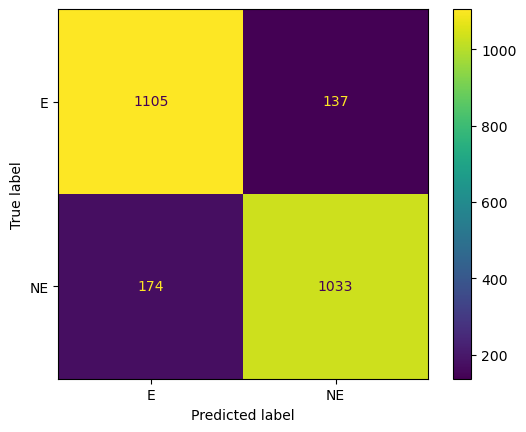

In [11]:
import pandas as pd
import numpy as np
from help.preprocess.loaders import feature_assemble_df
from help.models.prediction import predict_cv
tissue = 'Kidney'
df_y = pd.read_csv(f"../datafinal/{tissue}_HELP.csv", index_col=0)
#df_y = df_y[df_y['label'].isin(['E', 'sNE'])]
df_y = df_y.replace({'aE':'NE', 'sNE':'NE'})
print(df_y.value_counts())
features = [{'fname': f'../datafinal/{tissue}_BIO.csv', 'fixna' : False, 'normalize': 'std'},
            {'fname': f'../datafinal/{tissue}_CCcfs.csv', 'fixna' : False, 'normalize': 'std', 'nchunks' : 5},
            {'fname': f'../datafinal/{tissue}_EmbN2V_128.csv', 'fixna' : False, 'normalize': None}]
df_X, df_y = feature_assemble_df(df_y,features=features, subsample=True, fold=1, seed=4, verbose=True)
df_scores_means, df_scores, pred_kidney = predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, verbose=True, saveflag=False)
df_scores_means

# make Prediction with Voters

In [3]:
import pandas as pd
import numpy as np
from help.preprocess.loaders import feature_assemble_df
from help.models.prediction import predict_cv_sv
tissue = 'Kidney'
df_y = pd.read_csv(f"../datafinal/{tissue}_HELP.csv", index_col=0)
#df_y = df_y[df_y['label'].isin(['E', 'sNE'])]
df_y = df_y.replace({'aE':'NE', 'sNE':'NE'})
print(df_y.value_counts())
features = [{'fname': f'../datafinal/{tissue}_BIO.csv', 'fixna' : False, 'normalize': 'std'},
            {'fname': f'../datafinal/{tissue}_CCcfs.csv', 'fixna' : False, 'normalize': 'std', 'nchunks' : 5},
            {'fname': f'../datafinal/{tissue}_EmbN2V_128.csv', 'fixna' : False, 'normalize': None}]
df_X, df_y = feature_assemble_df(df_y,features=features, seed=4, verbose=True)
df_scores, pred_kidney = predict_cv_sv(df_X, df_y, n_splits=5, n_voters=10, balanced=True, verbose=True)

label
NE       16678
E         1253
Name: count, dtype: int64
Majority NE 16678 minority E 1253
[Kidney_BIO.csv] found 52532 Nan...
[Kidney_BIO.csv] Normalization with std ...


Loading file in chunks: 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]


[Kidney_CCcfs.csv] found 6676644 Nan...
[Kidney_CCcfs.csv] Normalization with std ...
[Kidney_EmbN2V_128.csv] found 0 Nan...
[Kidney_EmbN2V_128.csv] No normalization...


/Users/maurizio/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


17236 labeled genes over a total of 17931
(17236, 3456) data input
{'E': 0, 'NE': 1}
label
NE       1600
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:14<00:00,  2.90s/it]


{'E': 0, 'NE': 1}
label
NE       1600
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:15<00:00,  3.12s/it]


{'E': 0, 'NE': 1}
label
NE       1600
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:14<00:00,  2.92s/it]


{'E': 0, 'NE': 1}
label
NE       1600
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:14<00:00,  2.86s/it]


{'E': 0, 'NE': 1}
label
NE       1599
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:14<00:00,  2.85s/it]


{'E': 0, 'NE': 1}
label
NE       1599
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:14<00:00,  2.90s/it]


{'E': 0, 'NE': 1}
label
NE       1599
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold:  80%|████████  | 4/5 [00:11<00:02,  2.96s/it]

In [13]:
%cd ../datafinal

/Users/maurizio/HELP/help/datafinal


# Compute TPRs

In [12]:
import pandas as pd
from sklearn.metrics import *
nv = 0
#pred_kidney = pd.read_csv(f"pred_Kidney_sub.csv", index_col=0)
test_y = pred_kidney['label'].values
probs = pred_kidney['probabilities'].values
preds = pred_kidney['prediction'].values
roc_auc = roc_auc_score(test_y, 1-probs)
print(pd.DataFrame([[roc_auc, accuracy_score(test_y, preds), balanced_accuracy_score(test_y, preds),matthews_corrcoef(test_y, preds),confusion_matrix(test_y, preds)]], columns=['ROC', 'Acc', 'BA', 'MCC', 'CM'], index=[f"{nv}-voters"]).T)
num = len(pred_kidney[pred_kidney.index.isin(csEG_kidney)][pred_kidney['label'] == pred_kidney['prediction']])
den = len(pred_kidney[pred_kidney.index.isin(csEG_kidney)])
print(f"TPR {num /den:.3f}, {num}/{den}")


                       0-voters
ROC                    0.945478
Acc                    0.873009
BA                     0.872767
MCC                    0.746198
CM   [[1105, 137], [174, 1033]]
TPR 0.685, 37/54


/var/folders/gl/gkr8rrn52y9cvb9jc59pvjyw0000gn/T/ipykernel_26167/3560174121.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num = len(pred_kidney[pred_kidney.index.isin(csEG_kidney)][pred_kidney['label'] == pred_kidney['prediction']])


In [98]:
import pandas as pd
from sklearn.metrics import *
for nv in [1,3,5,7,10]:
    pred_kidney = pd.read_csv(f"pred_Kidney_SV_{nv}.csv", index_col=0)
    pred_kidney.map(lambda x: sum(x) if type(x) == list else x)
    test_y = pred_kidney['label'].values
    probs = pred_kidney['probabilities'].values
    preds = pred_kidney['prediction'].values
    roc_auc = roc_auc_score(test_y, 1-probs)
    print(pd.DataFrame([[roc_auc, accuracy_score(test_y, preds), balanced_accuracy_score(test_y, preds),matthews_corrcoef(test_y, preds),confusion_matrix(test_y, preds)]], columns=['ROC', 'Acc', 'BA', 'MCC', 'CM'], index=[f"{nv}-voters"]).T)
    num = len(pred_kidney[pred_kidney.index.isin(csEG_kidney)][pred_kidney['label'] == pred_kidney['prediction']])
    den = len(pred_kidney[pred_kidney.index.isin(csEG_kidney)])
    print(f"TPR {num /den:.3f}, {num}/{den}")


                       1-voters
ROC                    0.954942
Acc                    0.947029
BA                     0.832586
MCC                    0.628203
CM   [[868, 374], [539, 15455]]
TPR 0.259, 14/54
                       3-voters
ROC                    0.962631
Acc                    0.940009
BA                     0.874104
MCC                    0.637043
CM   [[990, 252], [782, 15212]]
TPR 0.444, 24/54
                         5-voters
ROC                      0.963267
Acc                      0.928348
BA                       0.890099
MCC                      0.617666
CM   [[1050, 192], [1043, 14951]]
TPR 0.537, 29/54
                         7-voters
ROC                      0.964197
Acc                      0.919297
BA                       0.900818
MCC                      0.605929
CM   [[1092, 150], [1241, 14753]]
TPR 0.704, 38/54
                        10-voters
ROC                      0.963653
Acc                      0.906707
BA                       0.905173
MCC 

/var/folders/gl/gkr8rrn52y9cvb9jc59pvjyw0000gn/T/ipykernel_50697/3835304061.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num = len(pred_kidney[pred_kidney.index.isin(csEG_kidney)][pred_kidney['label'] == pred_kidney['prediction']])
/var/folders/gl/gkr8rrn52y9cvb9jc59pvjyw0000gn/T/ipykernel_50697/3835304061.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num = len(pred_kidney[pred_kidney.index.isin(csEG_kidney)][pred_kidney['label'] == pred_kidney['prediction']])
/var/folders/gl/gkr8rrn52y9cvb9jc59pvjyw0000gn/T/ipykernel_50697/3835304061.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num = len(pred_kidney[pred_kidney.index.isin(csEG_kidney)][pred_kidney['label'] == pred_kidney['prediction']])
/var/folders/gl/gkr8rrn52y9cvb9jc59pvjyw0000gn/T/ipykernel_50697/3835304061.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num = len(pred_kidney[p

In [75]:
for nv in [3,5,7,10]:
    num = len(pred_kidney[pred_kidney.index.isin(csEG_kidney)][pred_kidney['label'] == pred_kidney['prediction']])
    den = len(pred_kidney[pred_kidney.index.isin(csEG_kidney)])
    num /den, num, den
#len(pred_lung[pred_lung.index.isin(csEG_lung)][pred_lung['label'] == pred_lung['prediction']]) / len(pred_lung[pred_lung.index.isin(csEG_lung)])

/var/folders/gl/gkr8rrn52y9cvb9jc59pvjyw0000gn/T/ipykernel_50697/4202609945.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num = len(pred_kidney[pred_kidney.index.isin(csEG_kidney)][pred_kidney['label'] == pred_kidney['prediction']])


(0.6851851851851852, 37, 54)

In [14]:
len(pred_kidney[pred_kidney.index.isin(csEG_kidney)][(pred_kidney['label'] == 0) & (pred_kidney['prediction'] == 0)]), len(csEG_kidney)

/var/folders/gl/gkr8rrn52y9cvb9jc59pvjyw0000gn/T/ipykernel_1542/1420333368.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(pred_kidney[pred_kidney.index.isin(csEG_kidney)][(pred_kidney['label'] == 0) & (pred_kidney['prediction'] == 0)]), len(csEG_kidney)


(39, 55)

In [41]:
len(pred_lung[pred_lung.index.isin(csEG_lung)][(pred_lung['label'] == 0) & (pred_lung['prediction'] == 0)]), len(csEG_lung)

/var/folders/gl/gkr8rrn52y9cvb9jc59pvjyw0000gn/T/ipykernel_52016/3651286790.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(pred_lung[pred_lung.index.isin(csEG_lung)][(pred_lung['label'] == 0) & (pred_lung['prediction'] == 0)]), len(csEG_lung)


(9, 23)